Credit card fraud detection system

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_recall_curve, roc_curve,roc_auc_score, average_precision_score,accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [43]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [44]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [45]:
df.shape

(63472, 31)

0.17% of transactions are fraudulent

In [46]:
frauds = (df['Class'] == 1).sum()
print(frauds)
print("Fraud percentage:", round(frauds / len(df) * 100, 2), "%")

165
Fraud percentage: 0.26 %


99.83% of transactions are genuine

In [47]:
genuine = (df['Class'] == 0).sum()
print(genuine)
print("Genuine percentage:", round(genuine / len(df) * 100, 2), "%")

63306
Genuine percentage: 99.74 %


Temporal Analysis -  Identifies patterns in transaction timing that correlate with fraud.

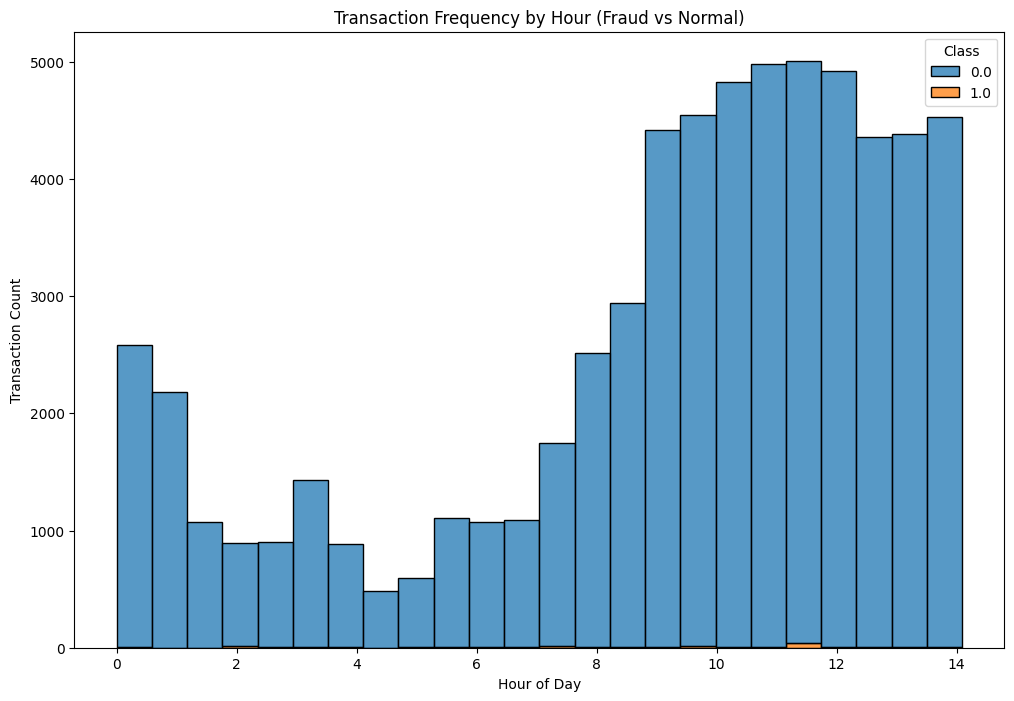

In [48]:
df['Hour'] = (df['Time']/3600) % 24

plt.figure(figsize=(12,8))
sns.histplot(data=df,x='Hour',bins=24,hue='Class',multiple='stack')
plt.title("Transaction Frequency by Hour (Fraud vs Normal)")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()

Transaction amount analysis - Visualizes transaction amount distribution between fraud and normal transactions,frauds often have distinct or high-value amounts.

Text(0, 0.5, 'Transaction Amount')

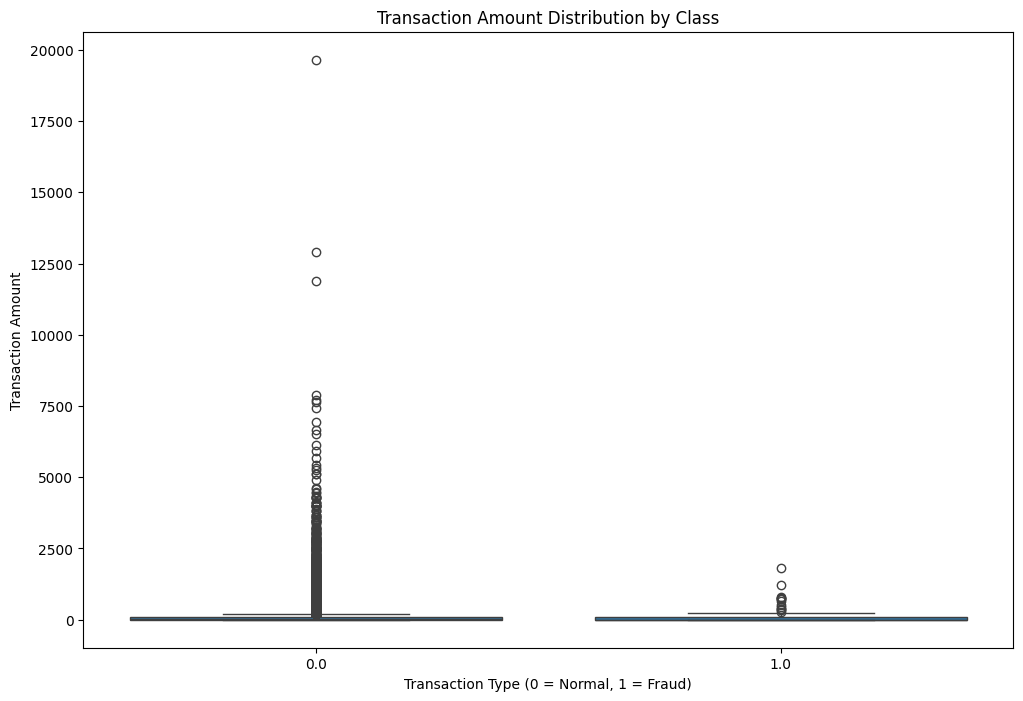

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Class',y='Amount')
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Transaction Type (0 = Normal, 1 = Fraud)")
plt.ylabel("Transaction Amount")


Transaction time density plot - Compares transaction time distributions for frauds vs. normal transactions to see when frauds typically occur.

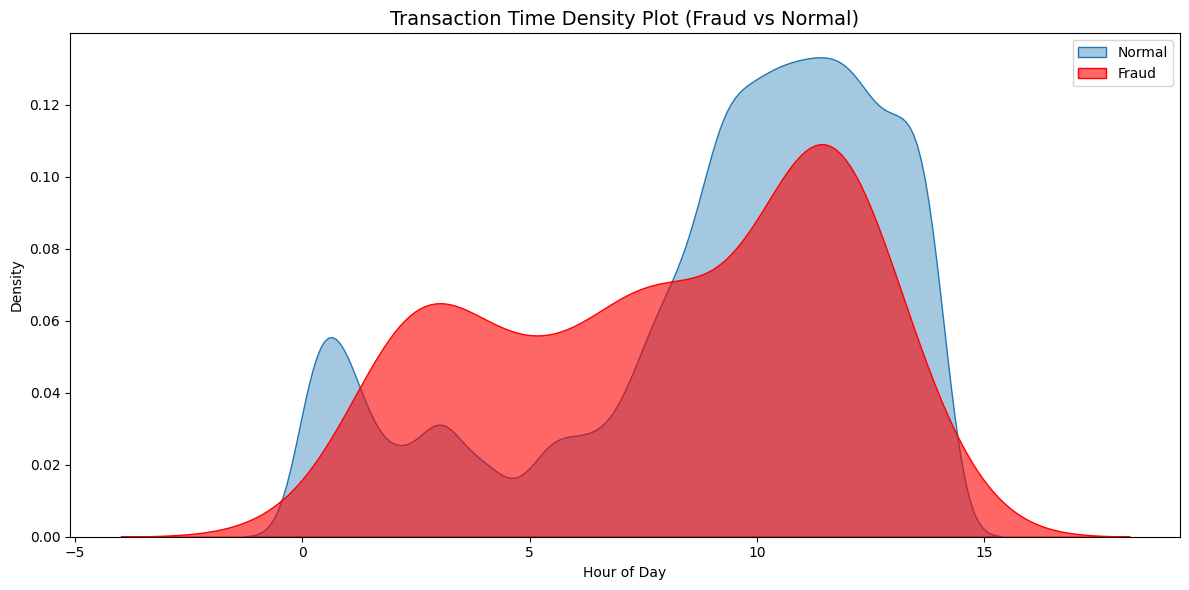

In [50]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df[df['Class']==0],x='Hour',fill=True,label='Normal',alpha=0.4)
sns.kdeplot(data=df[df['Class']==1],x='Hour',fill=True,label='Fraud',alpha=0.6,color='red')

plt.title('Transaction Time Density Plot (Fraud vs Normal)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [34]:
#Undersampling
under_sample=RandomUnderSampler(random_state=42)
X_u,y_u=under_sample.fit_resample(X,y)

print("Before:", y.value_counts())
print("After:", y_u.value_counts())


Before: Class
0    284315
1       492
Name: count, dtype: int64
After: Class
0    492
1    492
Name: count, dtype: int64


In [36]:
#Oversampling - SMOTE
over_sample = SMOTE(random_state=42)
X_o,y_o=over_sample.fit_resample(X,y)

print("Before:", y.value_counts())
print("After (SMOTE):", y_o.value_counts())


Before: Class
0    284315
1       492
Name: count, dtype: int64
After (SMOTE): Class
0    284315
1    284315
Name: count, dtype: int64


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
#Ensemple method
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.90      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962



Correlation analysis - Measures how strongly each feature correlates with the fraud class.
Features with higher correlation are more influential for detecting fraud.

/tmp/ipython-input-2891933537.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette='viridis')


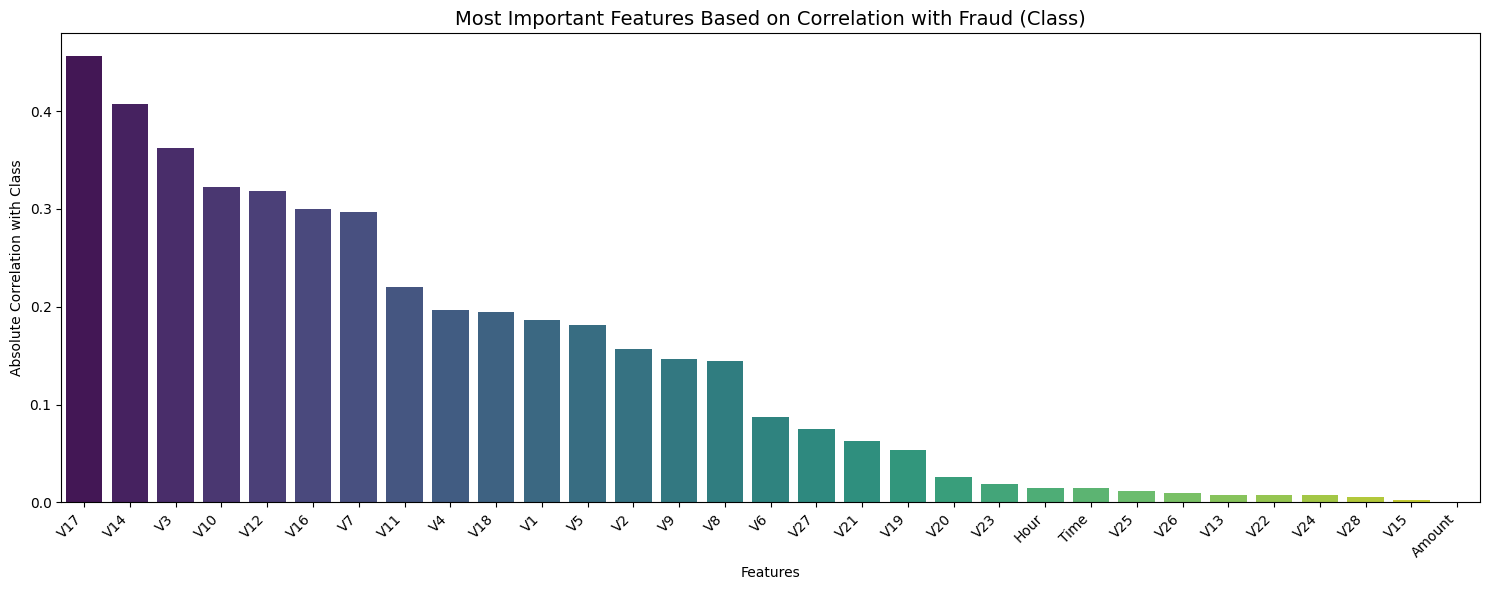

Top 10 correlated features:
 ['V17', 'V14', 'V3', 'V10', 'V12', 'V16', 'V7', 'V11', 'V4', 'V18']


In [52]:
#correlation analysis
corr = df.corr(numeric_only=True)['Class'].abs().sort_values(ascending=False)
corr=corr[corr.index!='Class']

plt.figure(figsize=(15, 6))
sns.barplot(x=corr.index, y=corr.values, palette='viridis')
plt.title('Most Important Features Based on Correlation with Fraud (Class)', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_features = corr.head(10).index.tolist()
print("Top 10 correlated features:\n", top_features)


Feature distribution vs class (KDE Plots) - Visualizes feature-wise differences in data distributions for fraud vs normal transactions to understand model-relevant patterns.

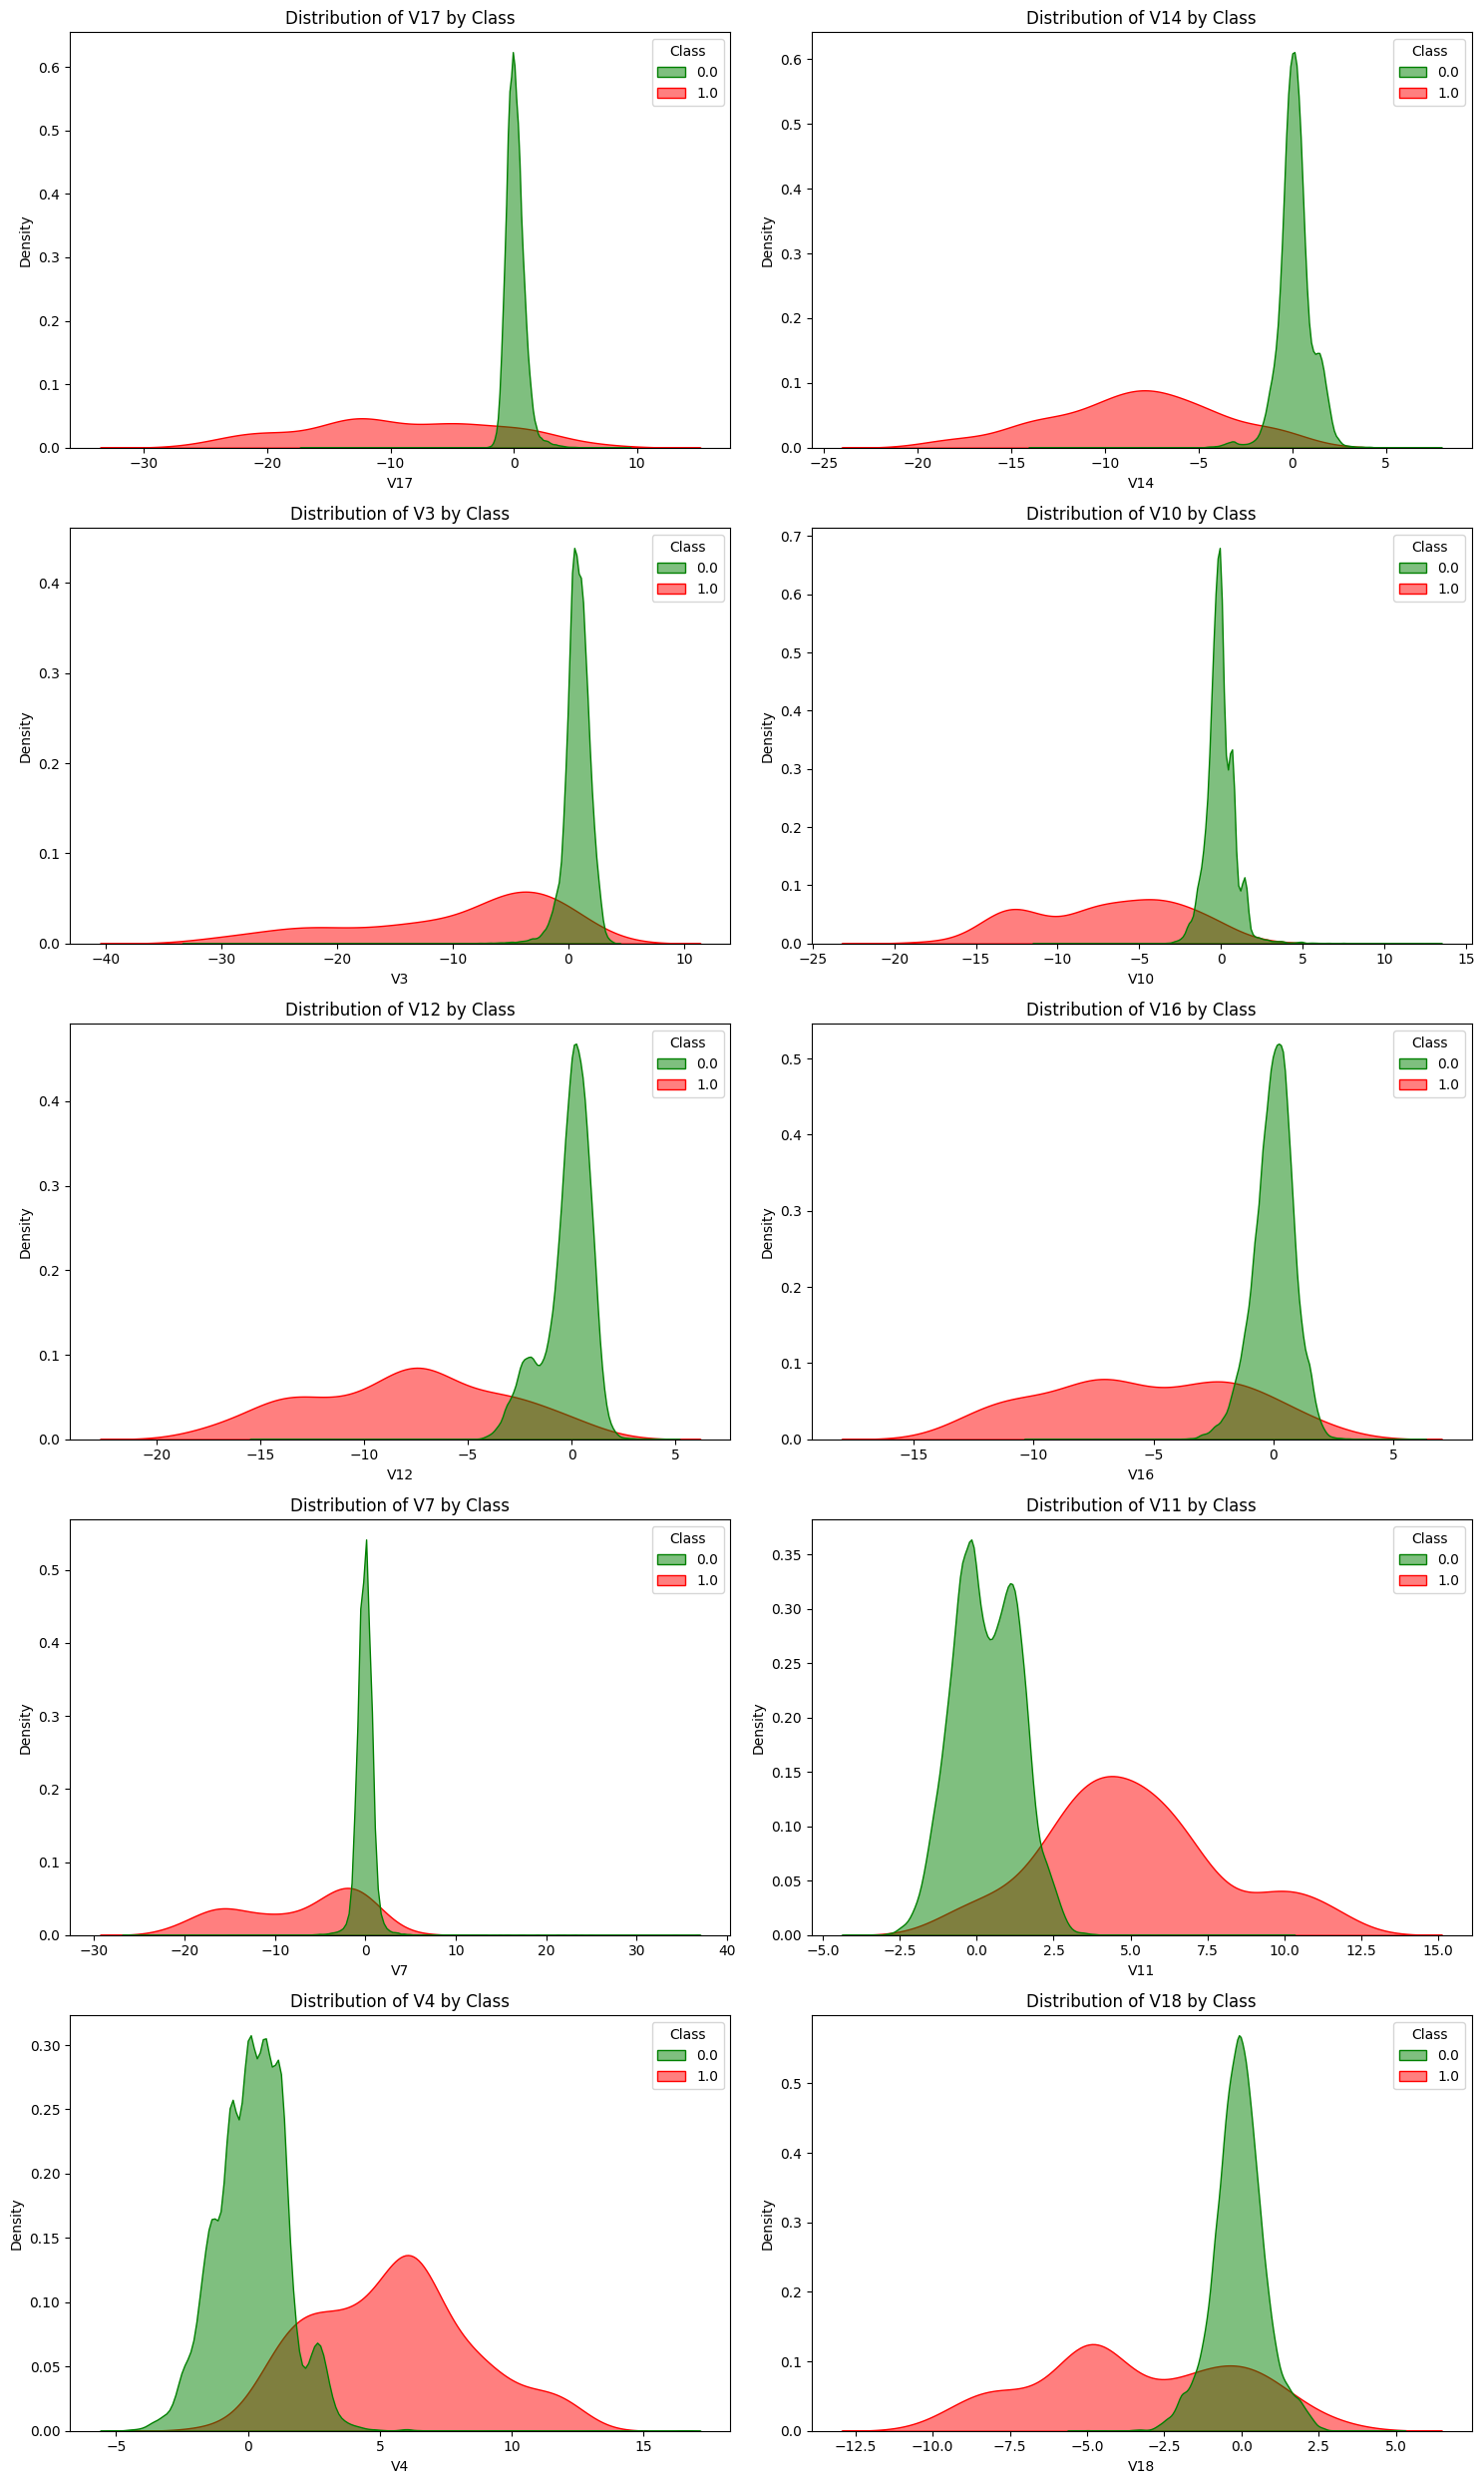

In [53]:
selected_features = top_features[:10]

n_features = len(selected_features)
rows = math.ceil(n_features / 2)
cols = 2

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True, common_norm=False,
                alpha=0.5, palette=['green', 'red'])
    plt.title(f'Distribution of {feature} by Class', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


Outlier detection (IQR method) - Identifies and counts outliers for each numeric feature using the Interquartile Range (IQR) method.
Outliers can often represent fraudulent activities, so they are not removed, but rather flagged for analysis.

/tmp/ipython-input-1626866131.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outlier_df, x='Feature', y='Outlier_Count', palette='mako')


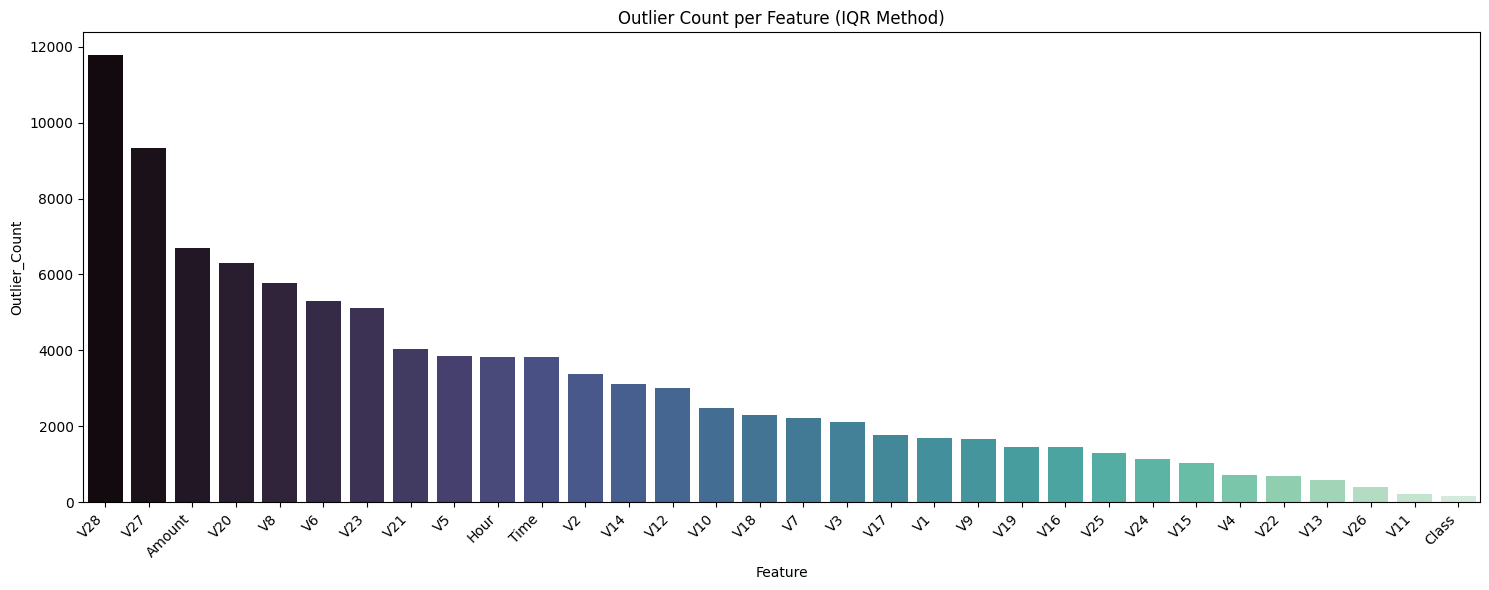

Features with most outliers:
    Feature  Outlier_Count
28     V28          11788
27     V27           9325
29  Amount           6692
20     V20           6308
8       V8           5788


In [54]:
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Outlier_Count'])
outlier_df = outlier_df.sort_values(by='Outlier_Count', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(data=outlier_df, x='Feature', y='Outlier_Count', palette='mako')
plt.title('Outlier Count per Feature (IQR Method)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("Features with most outliers:\n", outlier_df.head(5))


In [55]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [56]:
df.dropna(inplace=True)

In [57]:
X=df.drop(columns=['Class'],axis=1)
y=df['Class']

Handling Imbalanced Data
Techniques Used:

1.Random Undersampling: Reduces the number of majority class (normal) samples.

2.SMOTE (Synthetic Minority Oversampling Technique): Generates new synthetic fraud samples.

In [58]:
def add_outlier_flags(df, cols):
    df = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[f'{col}_Outlier'] = ((df[col] < lower) | (df[col] > upper)).astype(int)
    return df

numeric_cols = df.select_dtypes(include=np.number).columns.drop('Class')
df = add_outlier_flags(df, numeric_cols)


scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


for name, target in zip(['Train', 'Validation', 'Test'], [y_train, y_val, y_test]):
    ratio = (target == 1).mean() * 100
    print(f"{name} fraud ratio: {ratio:.3f}%")



under_sampler = RandomUnderSampler(random_state=42)
X_train_u, y_train_u = under_sampler.fit_resample(X_train, y_train)

over_sampler = SMOTE(random_state=42)
X_train_o, y_train_o = over_sampler.fit_resample(X_train, y_train)

print("\nBefore:", y_train.value_counts().to_dict())
print("After undersampling:", y_train_u.value_counts().to_dict())
print("After oversampling (SMOTE):", y_train_o.value_counts().to_dict())


Training set: 50776 samples
Validation set: 6347 samples
Test set: 6348 samples
Train fraud ratio: 0.260%
Validation fraud ratio: 0.252%
Test fraud ratio: 0.268%

Before: {0.0: 50644, 1.0: 132}
After undersampling: {0.0: 132, 1.0: 132}
After oversampling (SMOTE): {0.0: 50644, 1.0: 50644}



Evaluating on Undersampled Data:


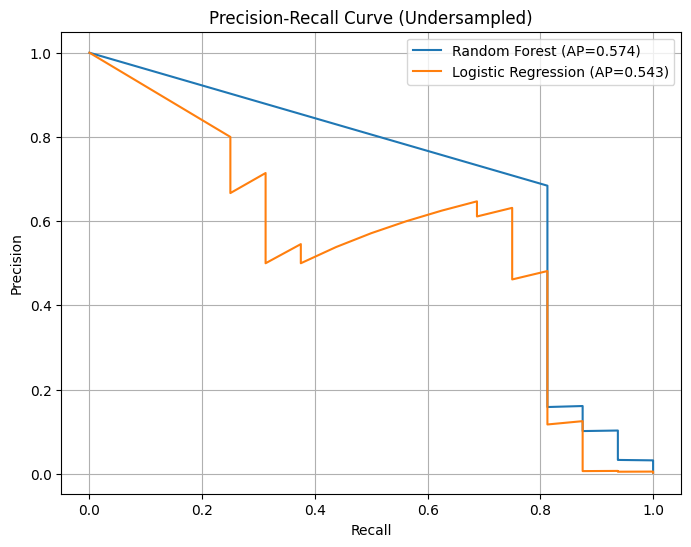

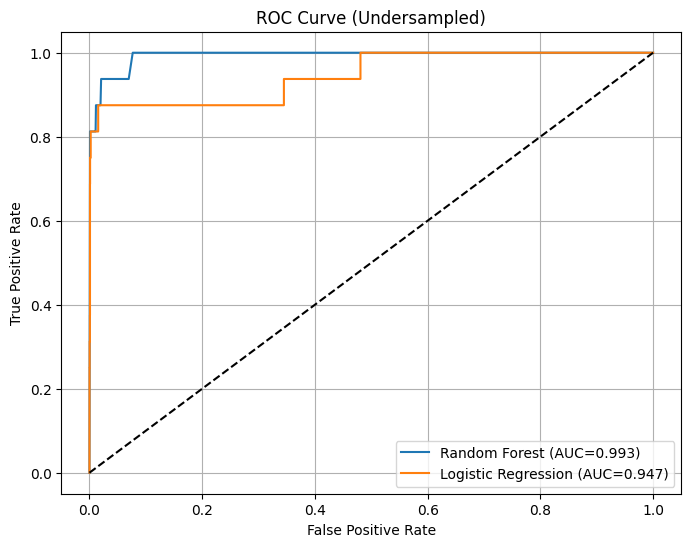


Evaluating on Oversampled (SMOTE) Data:


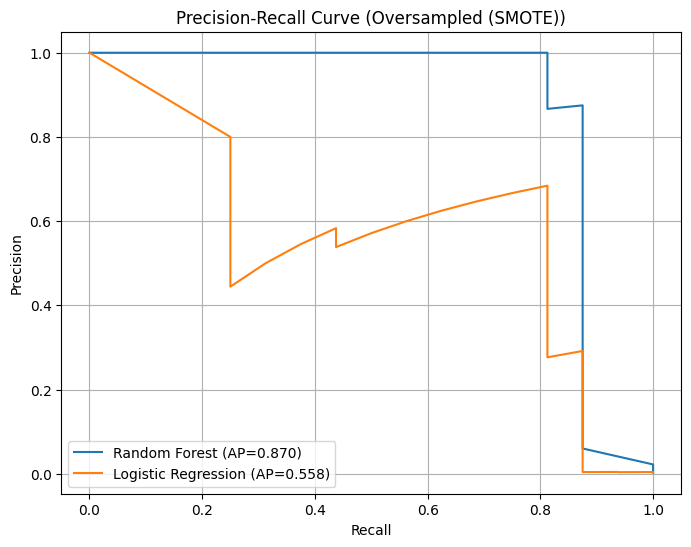

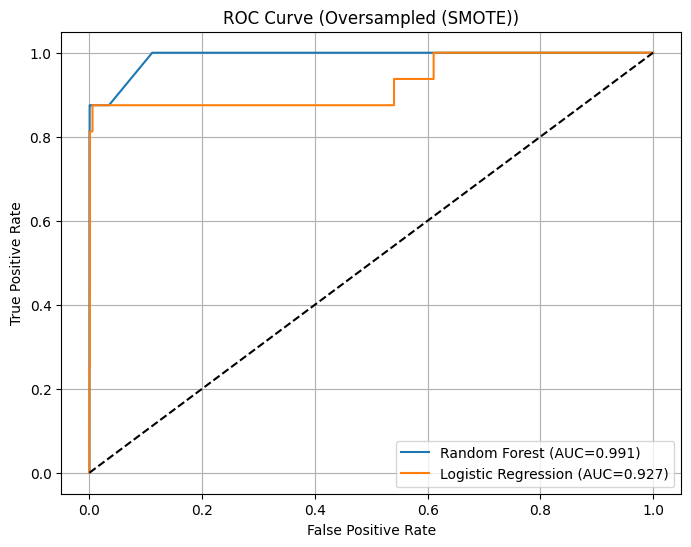

In [61]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced'),
    #"SVM": SVC(probability=True, kernel='rbf', class_weight='balanced', random_state=42)
}


def evaluate_models(X_tr, y_tr, label):
    pr_curves, roc_curves = {}, {}
    trained_models = {}

    for name, model in models.items():
        model.fit(X_tr, y_tr)
        y_proba = model.predict_proba(X_val)[:, 1]
        trained_models[name] = model


        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = roc_auc_score(y_val, y_proba)
        roc_curves[name] = (fpr, tpr, roc_auc)


        precision, recall, _ = precision_recall_curve(y_val, y_proba)
        ap = average_precision_score(y_val, y_proba)
        pr_curves[name] = (precision, recall, ap)


    plt.figure(figsize=(8,6))
    for name, (precision, recall, ap) in pr_curves.items():
        plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")
    plt.title(f'Precision-Recall Curve ({label})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(8,6))
    for name, (fpr, tpr, roc_auc) in roc_curves.items():
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.title(f'ROC Curve ({label})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return trained_models

print("\nEvaluating on Undersampled Data:")
trained_under = evaluate_models(X_train_u, y_train_u, label="Undersampled")

print("\nEvaluating on Oversampled (SMOTE) Data:")
trained_over = evaluate_models(X_train_o, y_train_o, label="Oversampled (SMOTE)")

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Sampling
0,Random Forest,0.9869,0.1489,0.8235,0.2523,0.9718,Undersampled
1,Logistic Regression,0.9743,0.0756,0.7647,0.1376,0.9303,Undersampled
2,Random Forest,0.9987,0.8462,0.6471,0.7333,0.9972,SMOTE (Oversampled)
3,Logistic Regression,0.9866,0.1222,0.6471,0.2056,0.8600,SMOTE (Oversampled)


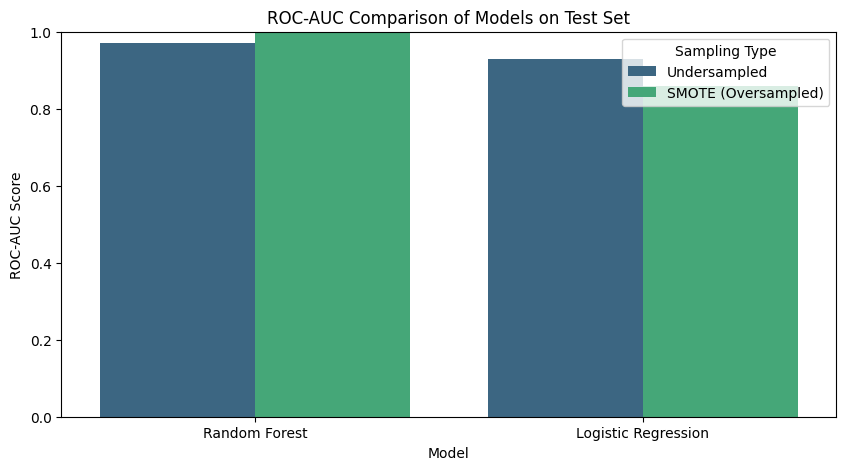

In [62]:
def test_models(X_train, y_train, label):
    results = []

    for name, model in models.items():

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]


        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)

        results.append({
            'Model': name,
            'Accuracy': round(acc, 4),
            'Precision': round(prec, 4),
            'Recall': round(rec, 4),
            'F1 Score': round(f1, 4),
            'ROC-AUC': round(roc_auc, 4),
            'Sampling': label
        })

    return pd.DataFrame(results)


test_results_under = test_models(X_train_u, y_train_u, label='Undersampled')
test_results_over = test_models(X_train_o, y_train_o, label='SMOTE (Oversampled)')

final_results = pd.concat([test_results_under, test_results_over], ignore_index=True)
display(final_results)


plt.figure(figsize=(10, 5))
sns.barplot(data=final_results, x='Model', y='ROC-AUC', hue='Sampling', palette='viridis')
plt.title('ROC-AUC Comparison of Models on Test Set')
plt.ylabel('ROC-AUC Score')
plt.ylim(0, 1)
plt.legend(title='Sampling Type')
plt.show()


| Metric    | Meaning                            |
| --------- | ---------------------------------- |
| Accuracy  | Overall correctness                |
| Precision | Correctness of predicted frauds    |
| Recall    | Ability to detect actual frauds    |
| F1 Score  | Balance between precision & recall |
| ROC-AUC   | Overall model performance          |
